# FB - Feature bagging detector
### A feature bagging detector is a meta estimator that fits a number of base detectors on various sub-samples of the dataset and use averaging or other combination methods to improve the predictive accuracy and control over-fitting.

### The sub-sample size is always the same as the original input sample size but the features are randomly sampled from half of the features to all features.

### By default, LOF is used as the base estimator. However, any estimator could be used as the base estimator, such as kNN and ABOD.

### Feature bagging first construct n subsamples by random selecting a subset of features, which induces the diversity of base estimators.

### Finally, the prediction score is generated by averaging/taking the maximum of all base detectors. 
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.feature_bagging

### Arguments that work with FeatureBagging algorithm:
1. base_estimator
2. n_estimators
3. contamination
4. max_features
5. bootstrap_features
6. check_detector
7. check_estimator
8. n_jobs
9. random_state
10. combination
11. verbose
12. estimator_params

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   197.032799 seconds
image downsampling       ...took     3.905540 seconds
image downsampling       ...took     5.315504 seconds
image downsampling       ...took     8.709469 seconds
image downsampling       ...took    12.955858 seconds
image downsampling       ...took    16.102249 seconds
image downsampling       ...took    19.511076 seconds
image downsampling       ...took    21.583120 seconds
image downsampling       ...took    25.921215 seconds
image downsampling       ...took    30.489850 seconds
image downsampling       ...took    32.675733 seconds
image downsampling       ...took    34.813748 seconds
image downsampling       ...took    36.933200 seconds
image downsampling       ...took    39.058389 seconds
image downsampling       ...took    41.220876 seconds
image downsampling       ...took    45.959597 seconds
image downsampling       ...took    50.758874 seconds
image downsampling       ...took    52.897588 seconds
image downsampling       ...

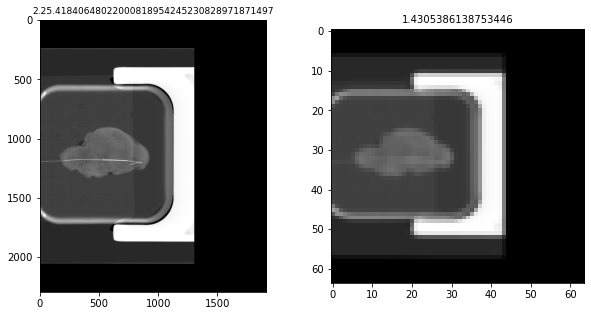

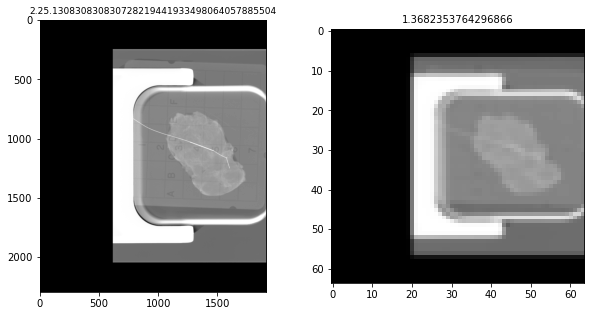

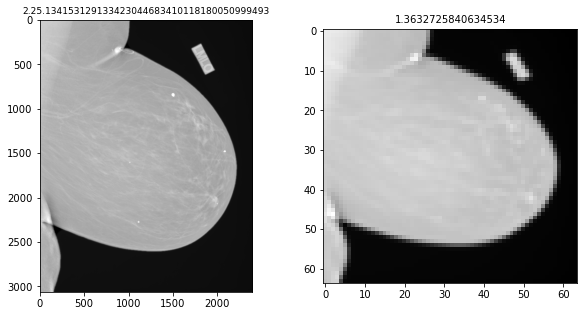

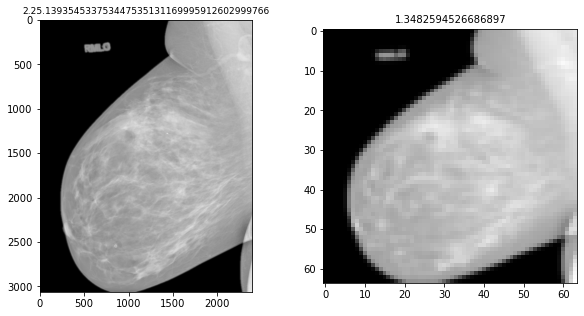

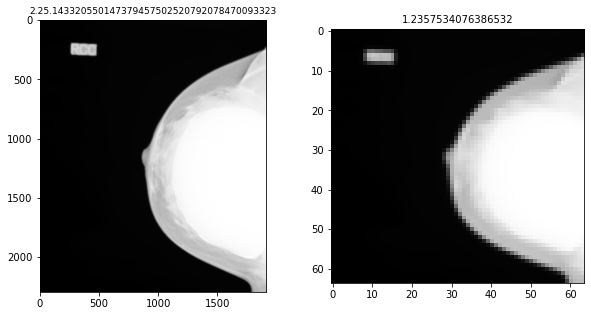

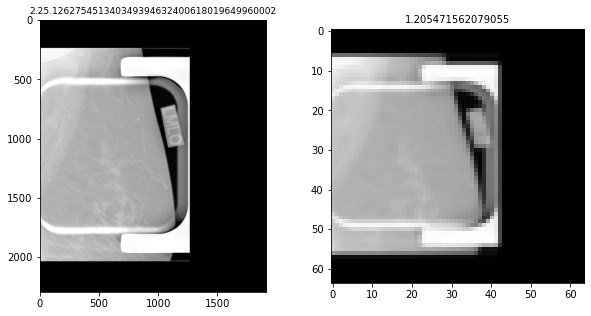

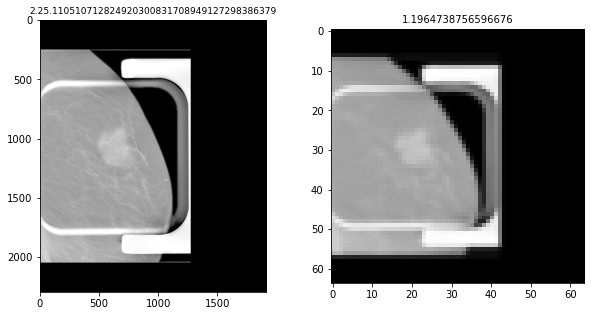

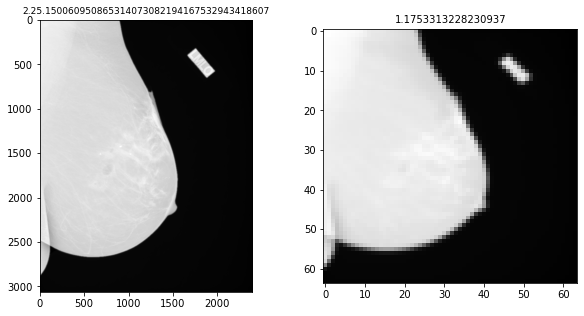

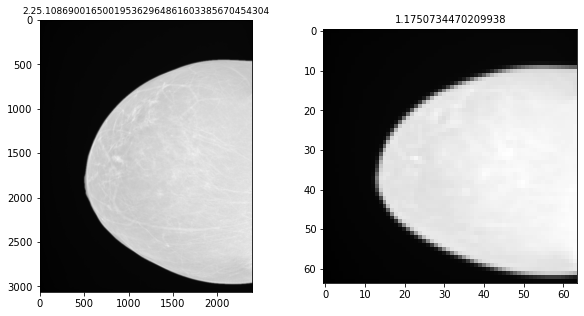

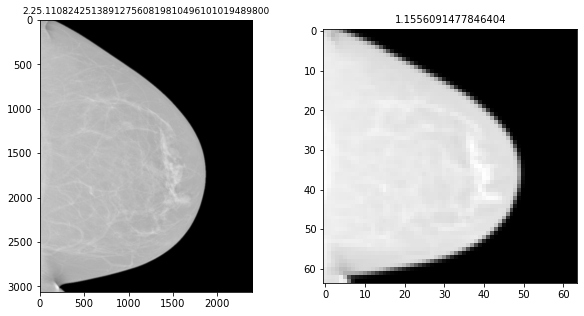

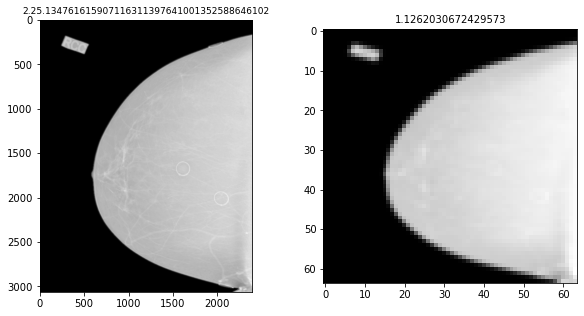

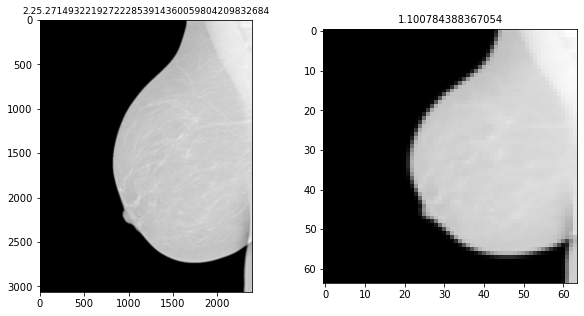

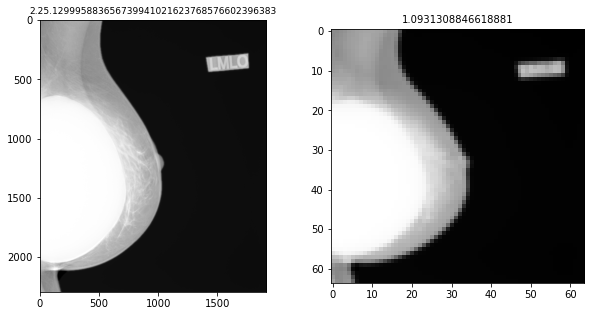

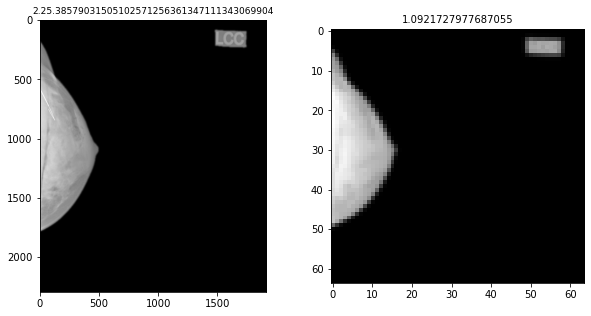

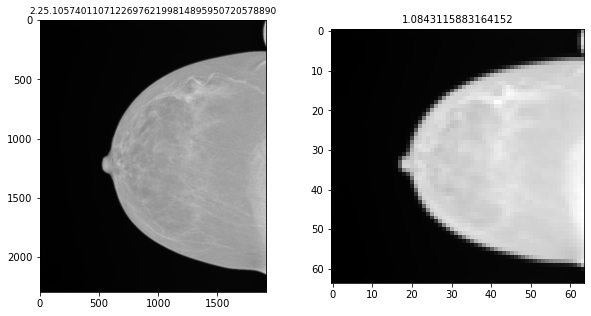

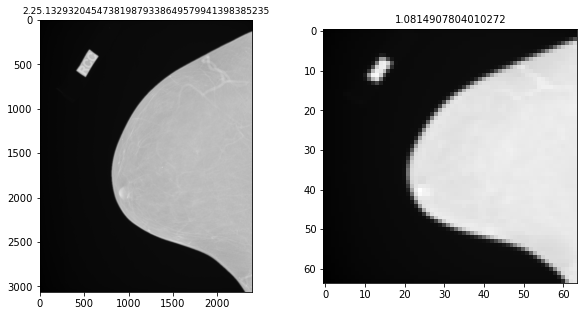

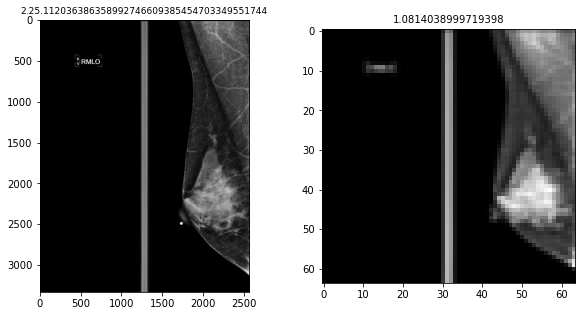

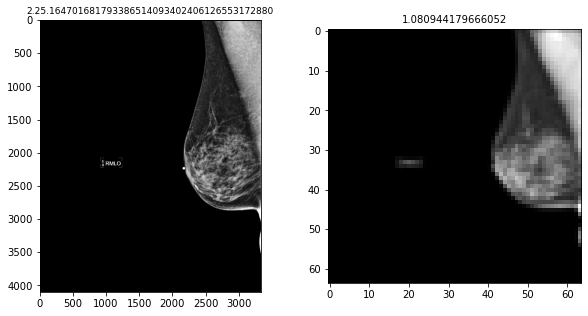

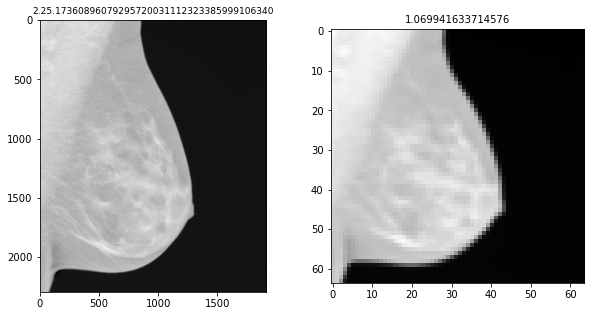

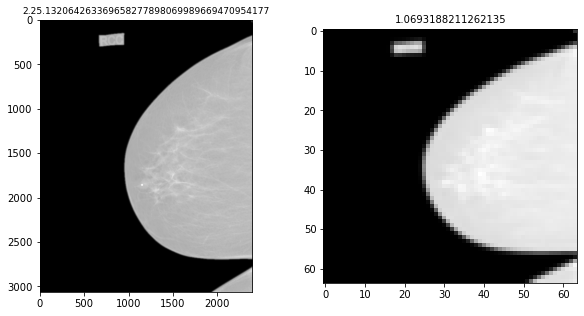

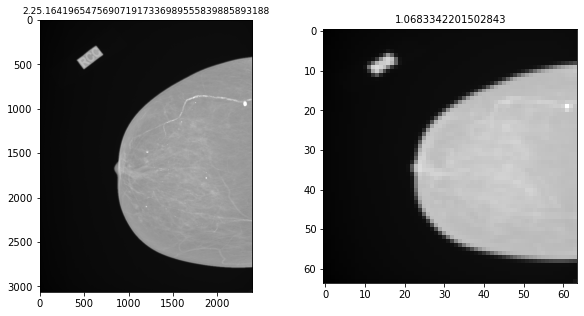

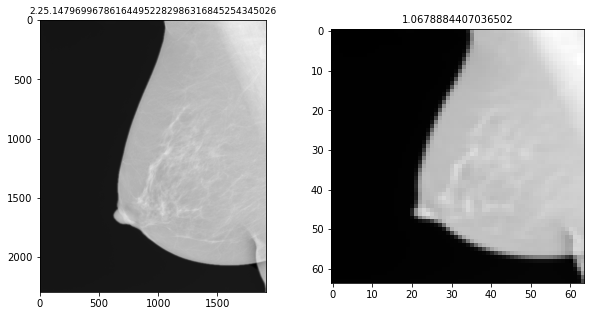

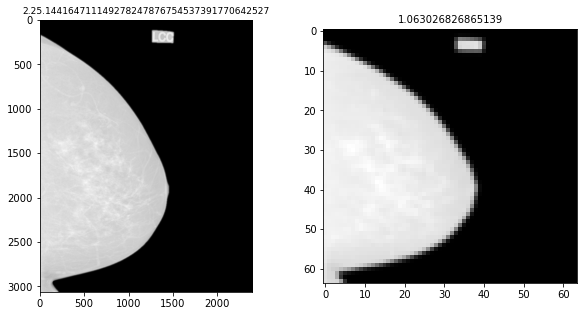

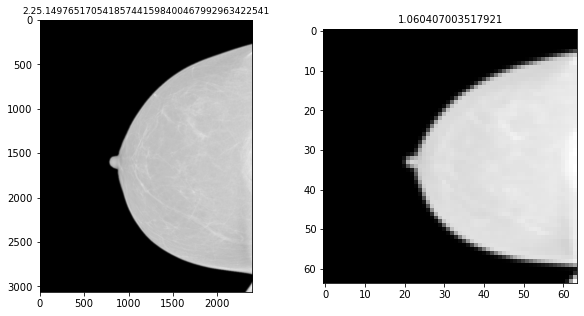

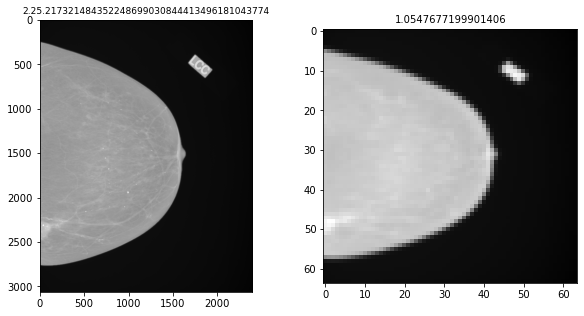

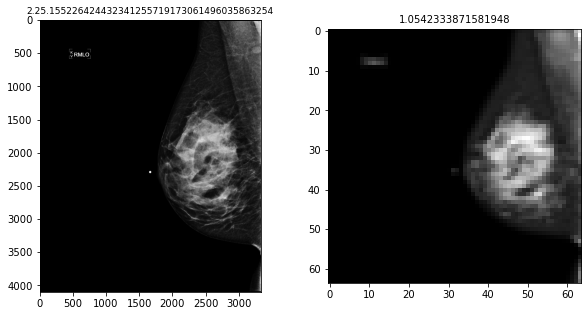

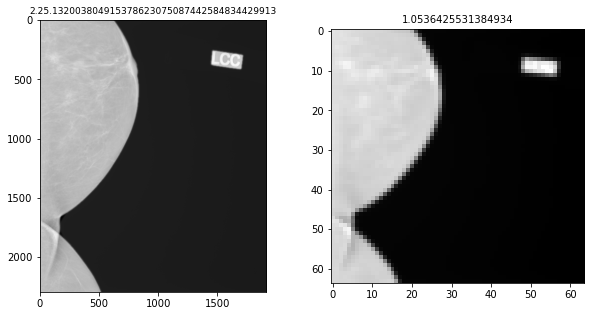

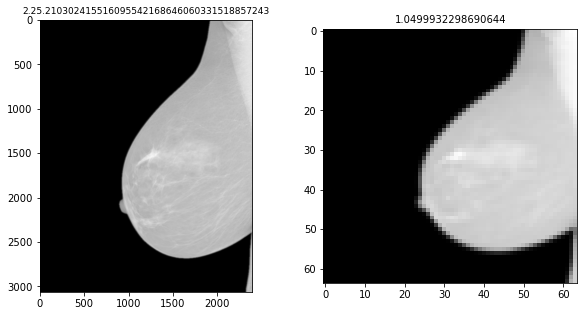

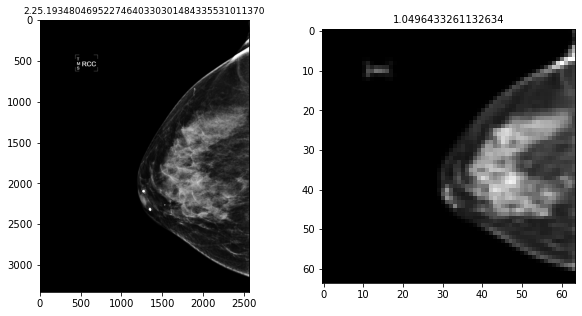

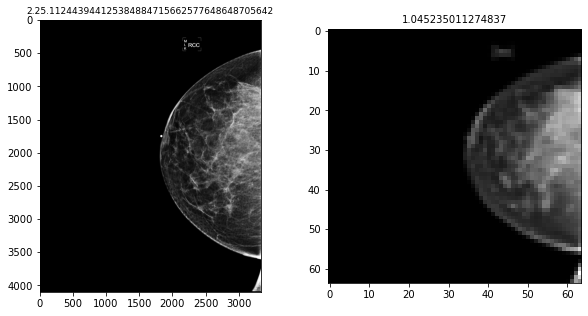

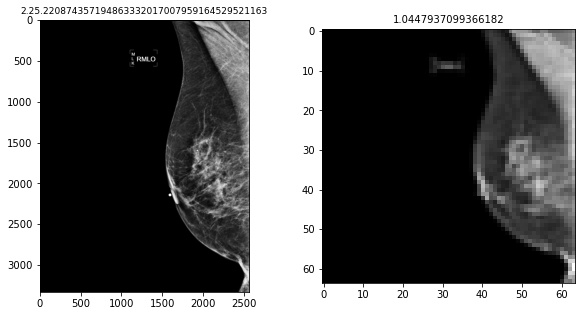

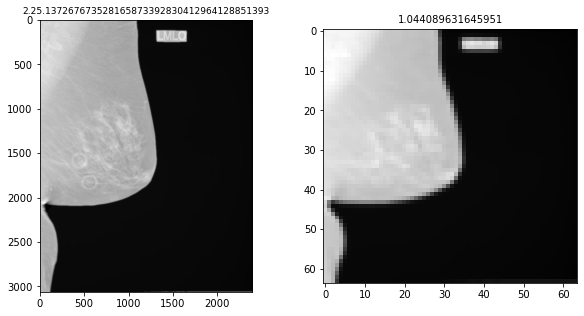

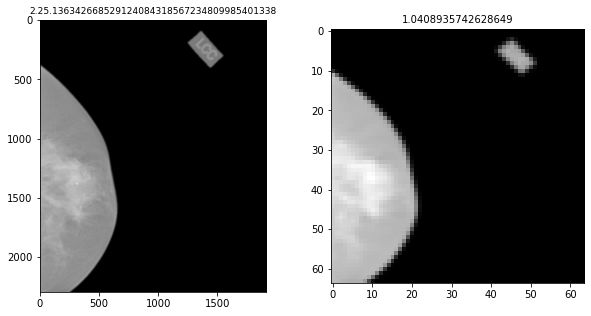

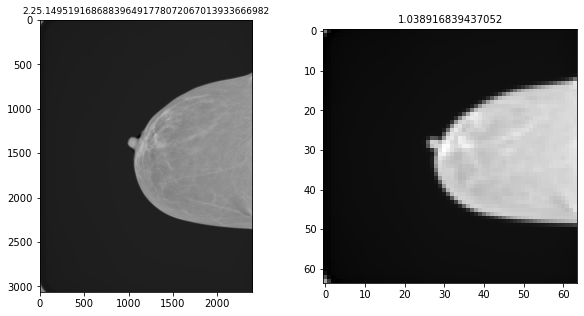

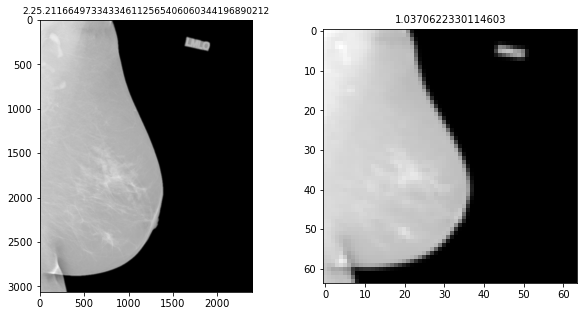

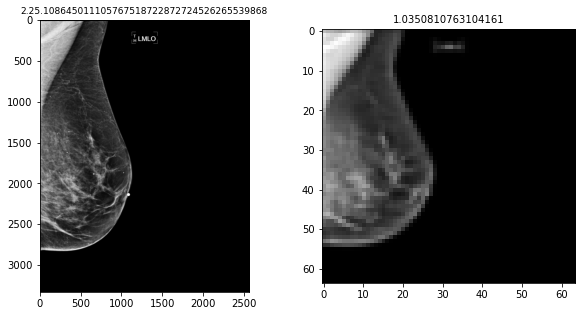

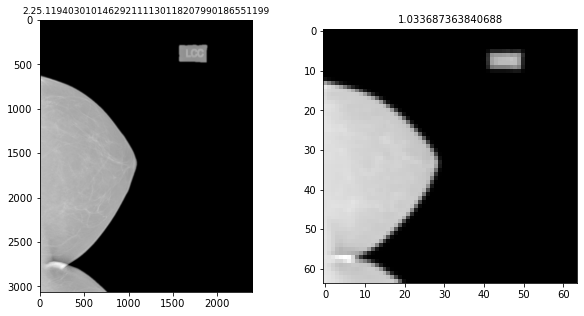

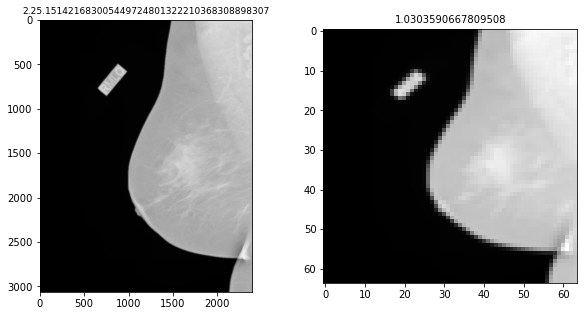

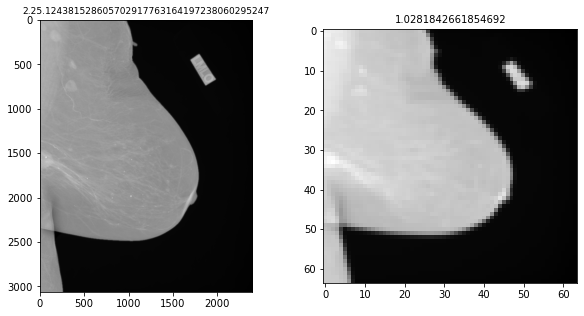

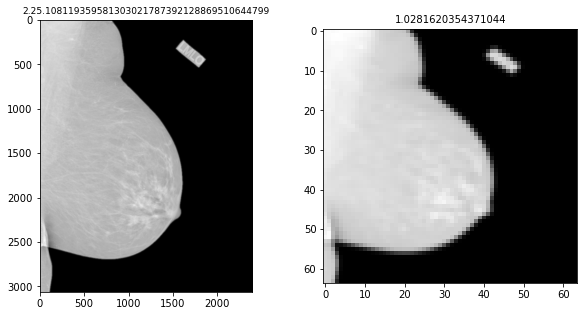

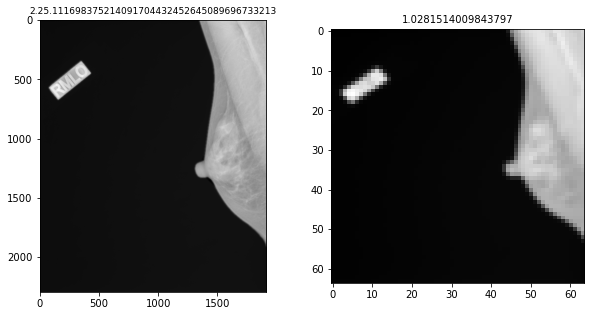

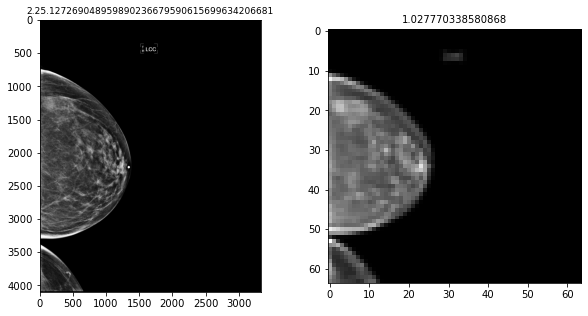

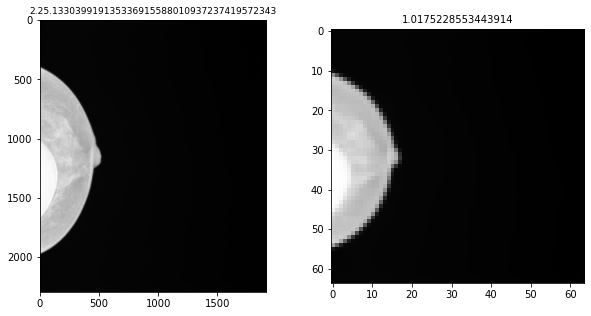

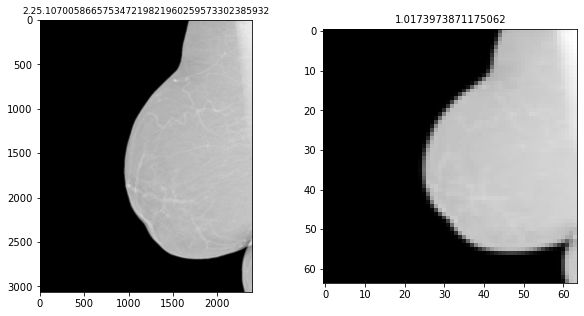

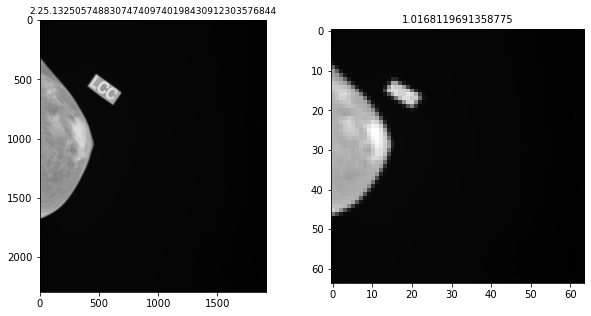

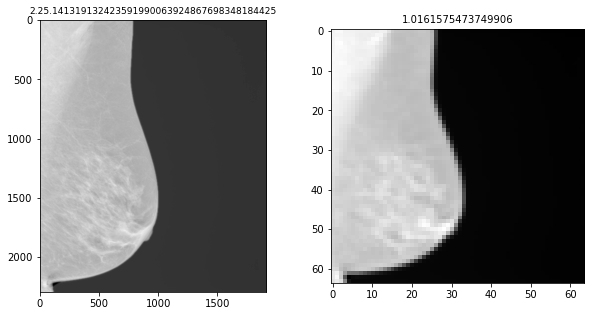

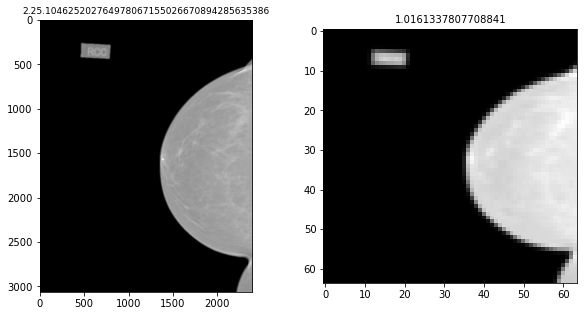

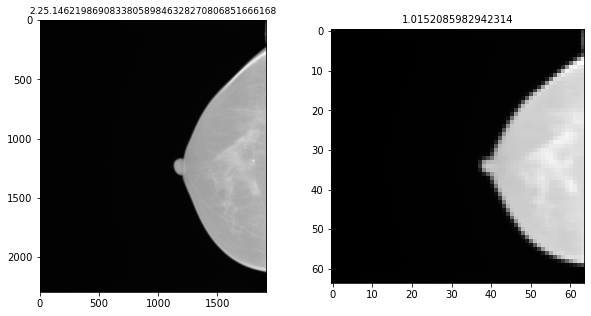

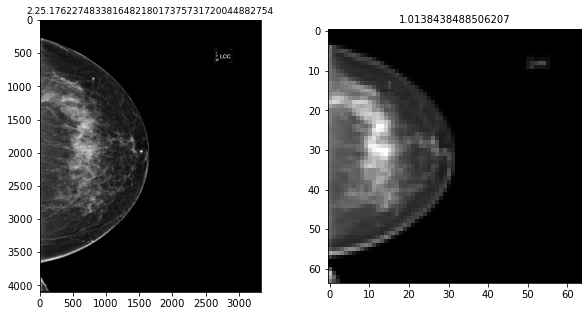

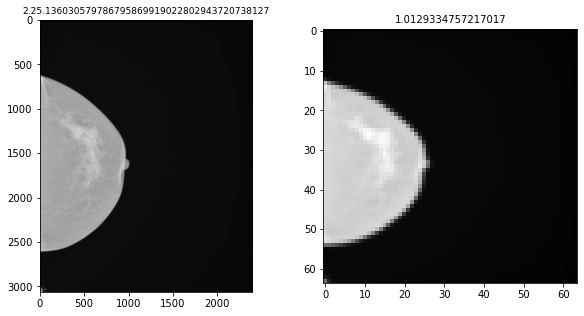

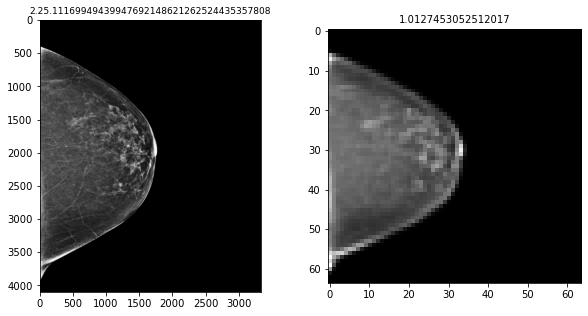

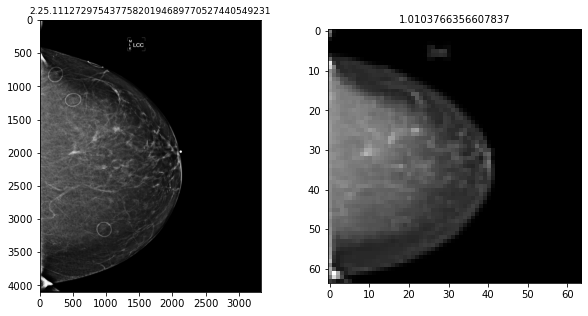

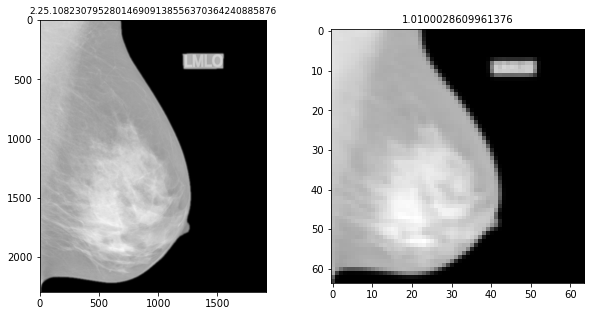

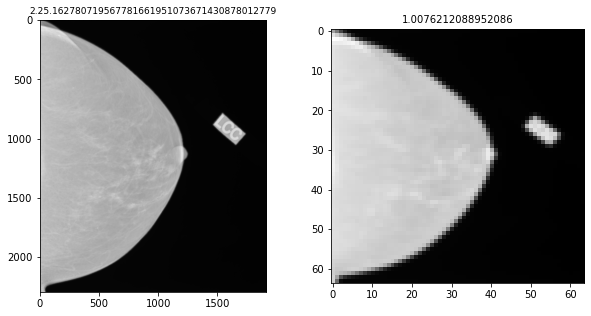

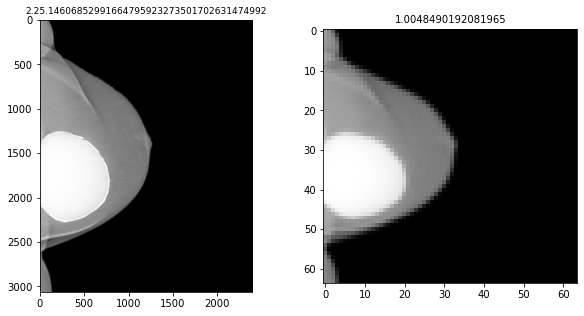

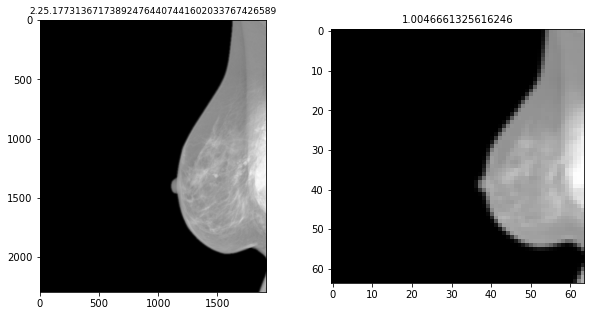

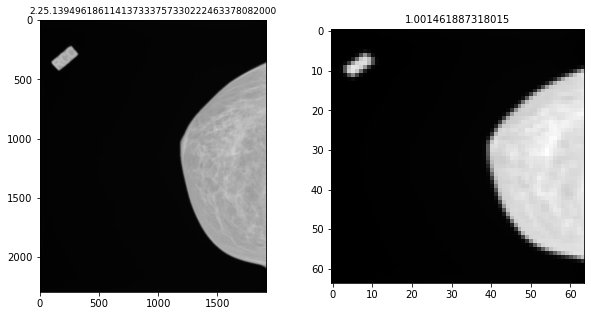

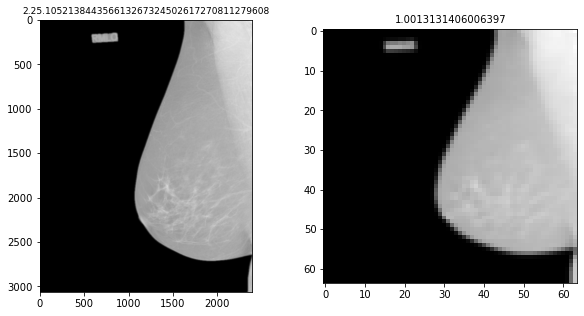

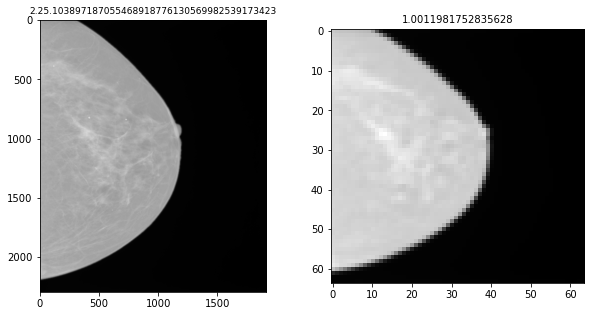

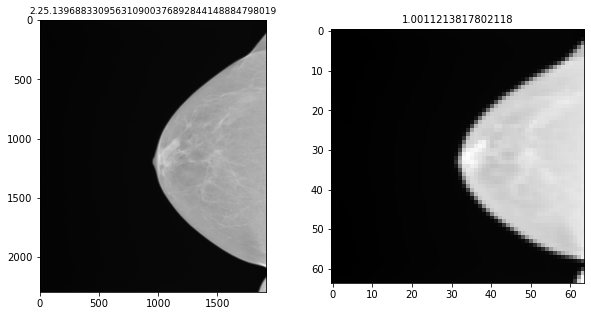

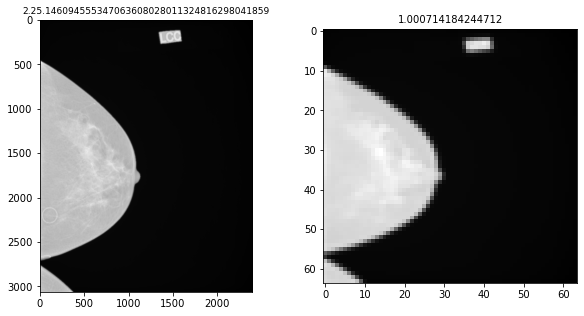

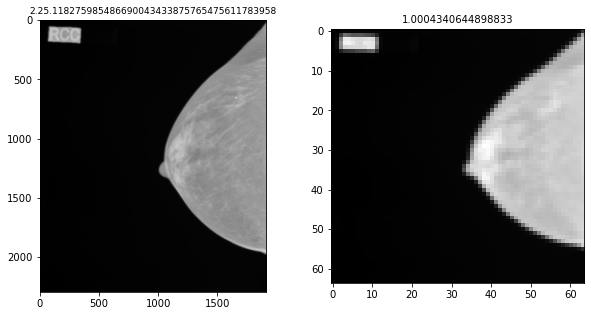

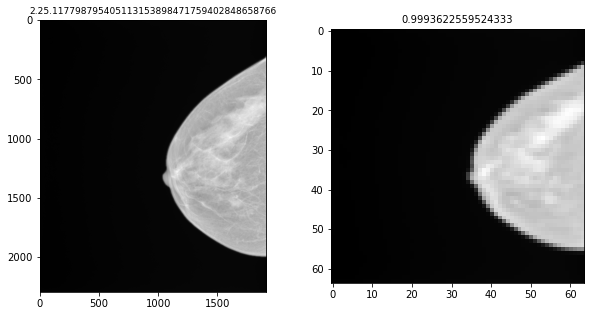

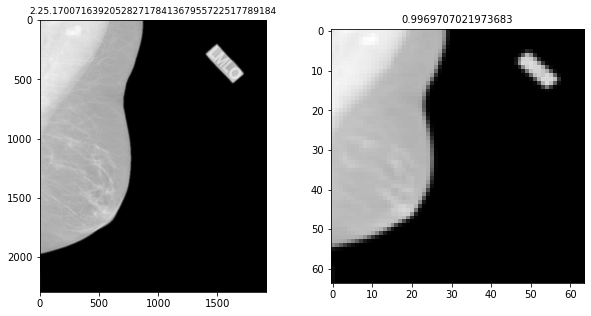

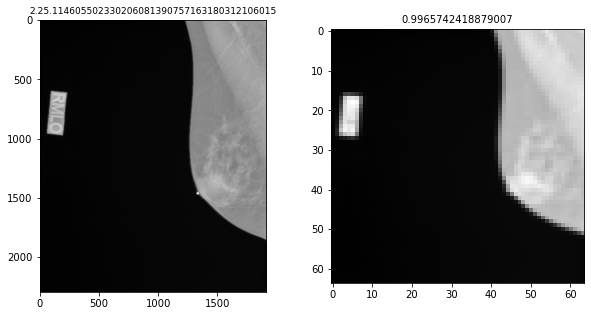

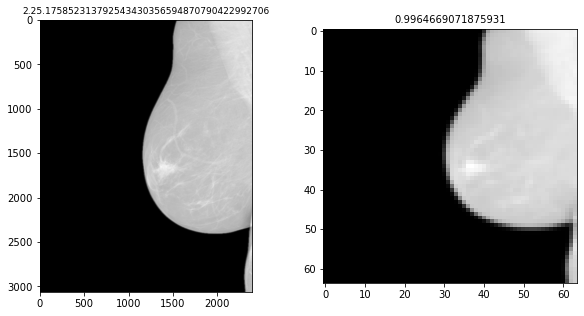

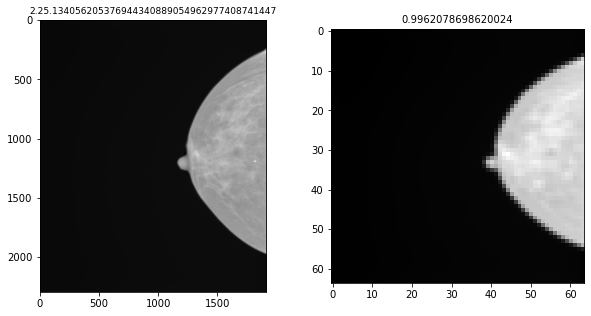

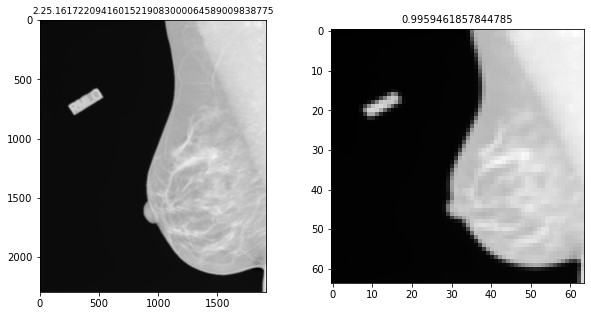

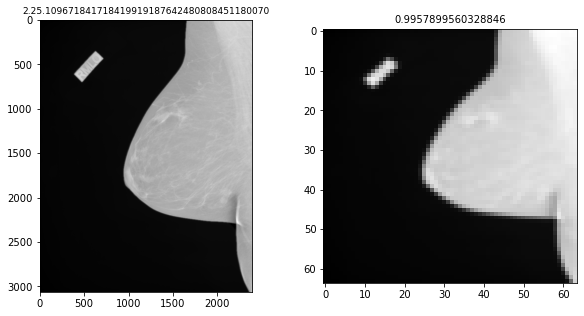

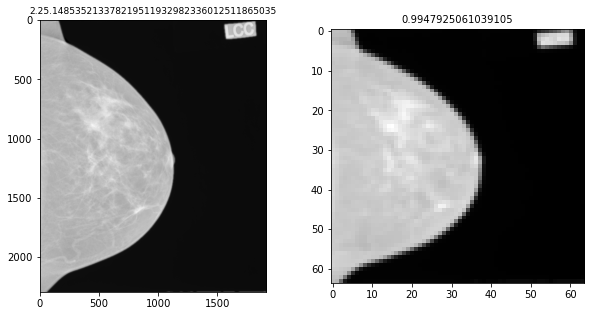

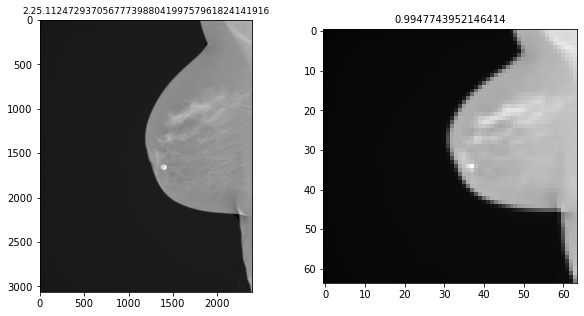

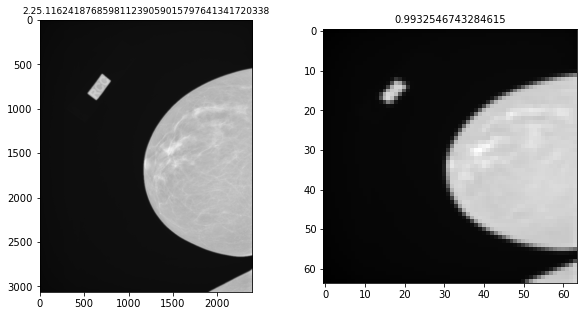

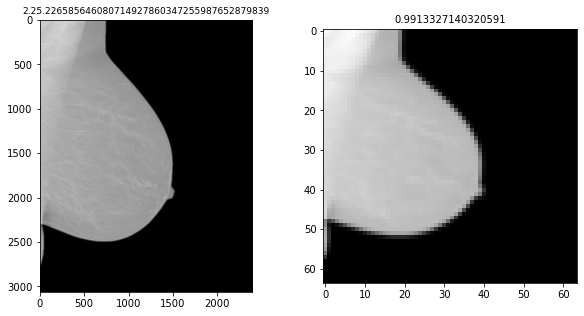

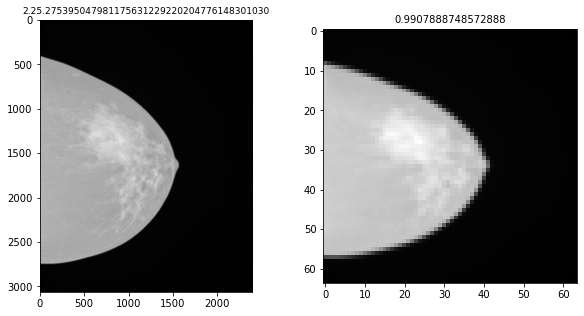

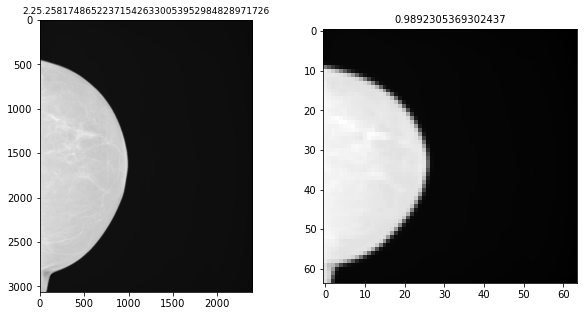

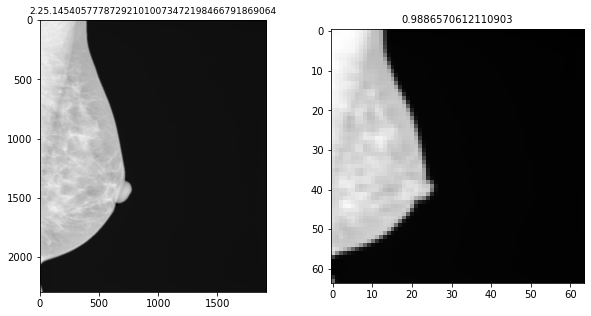

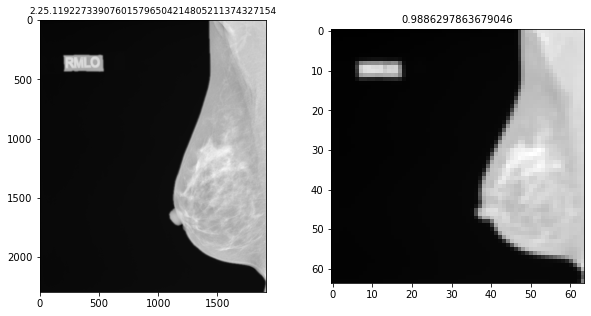

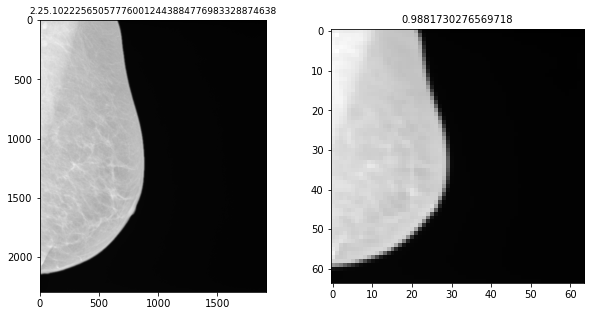

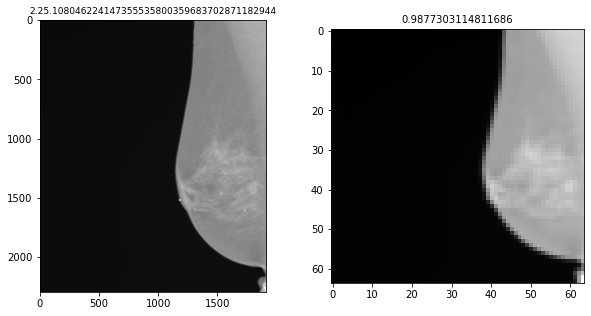

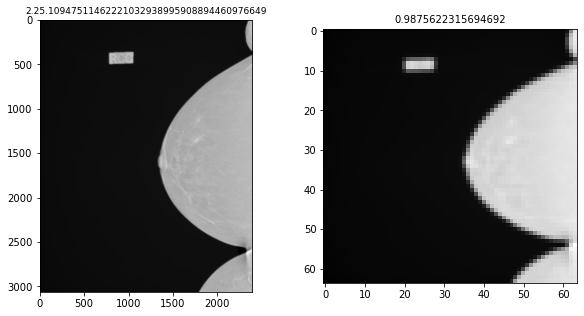

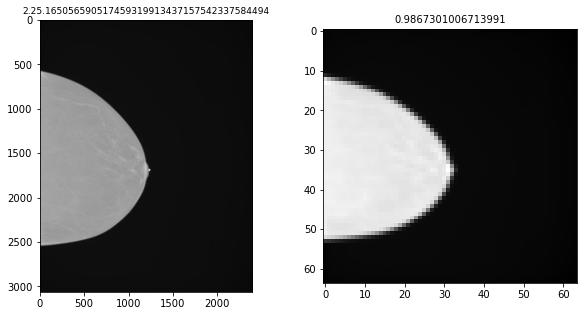

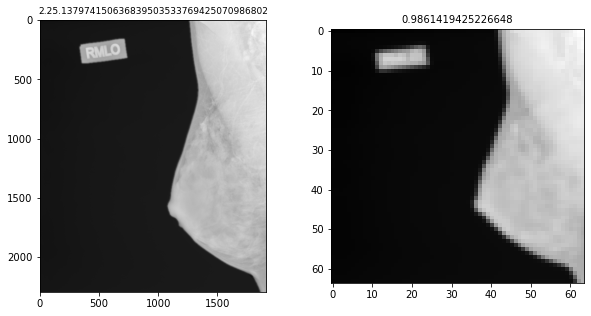

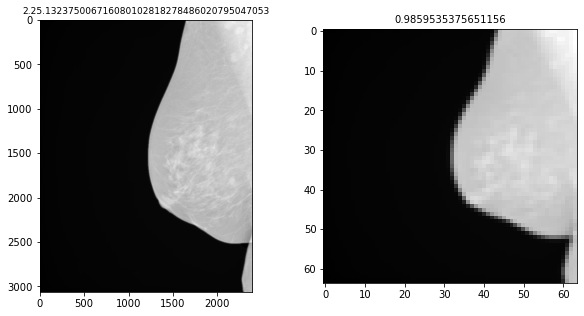

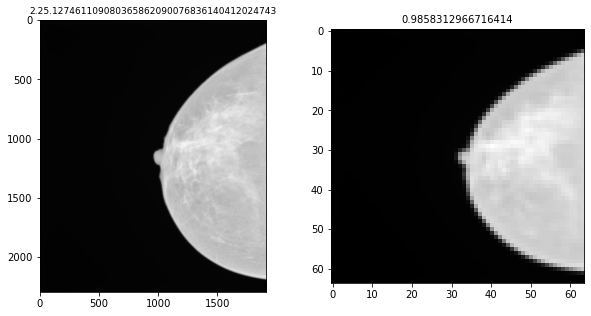

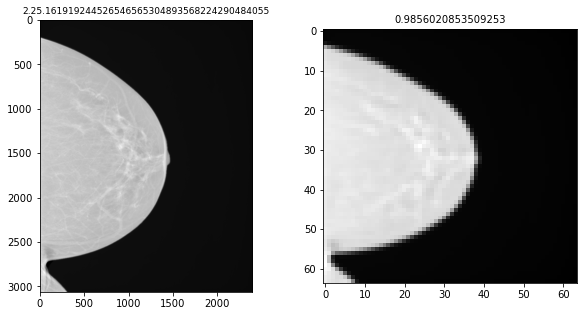

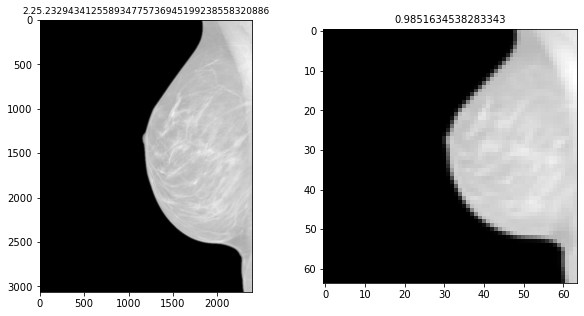

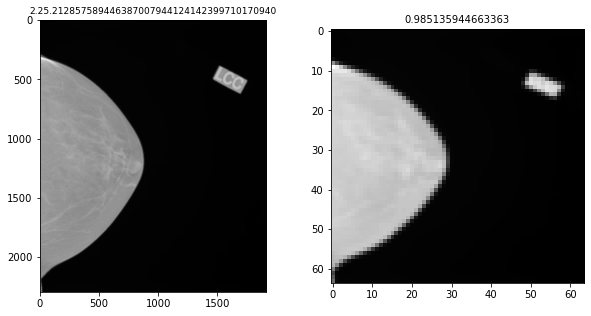

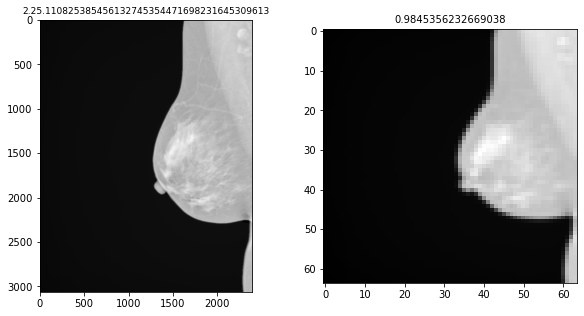

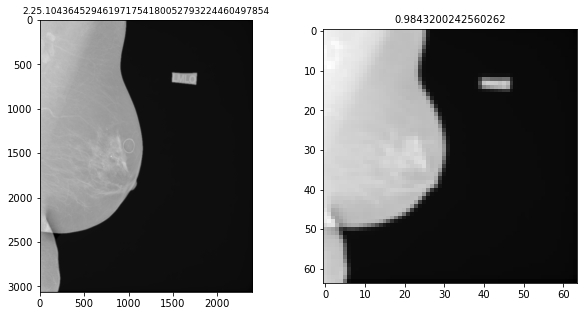

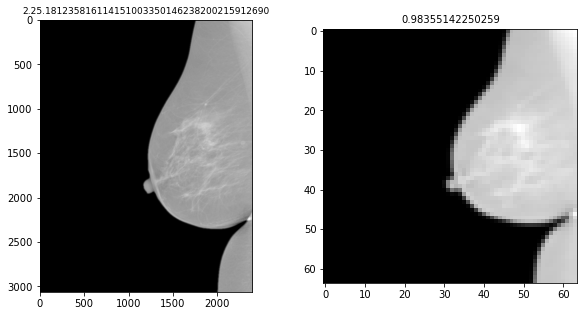

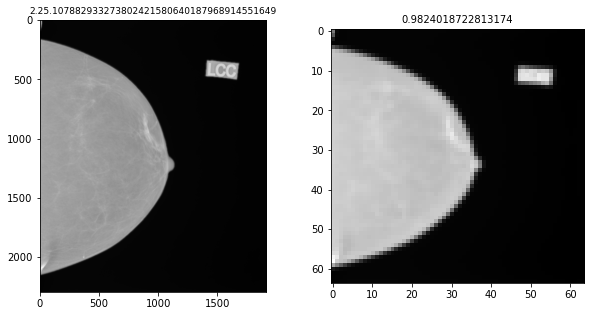

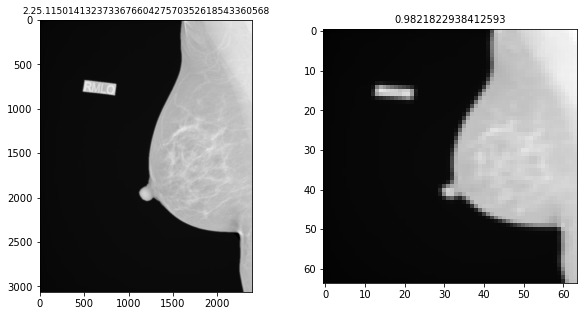

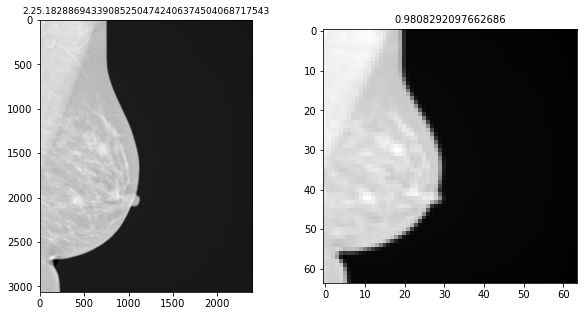

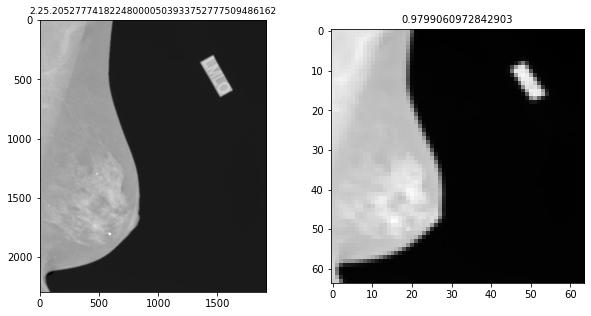

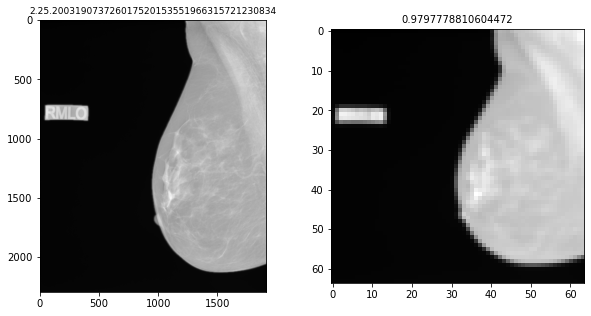

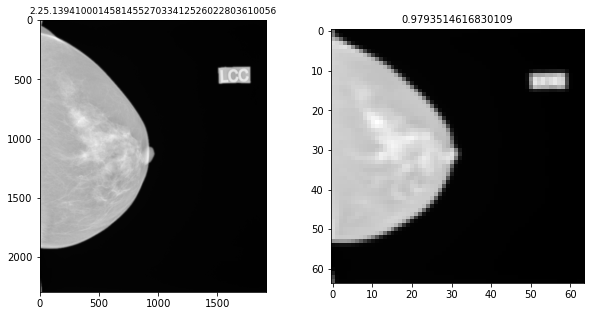

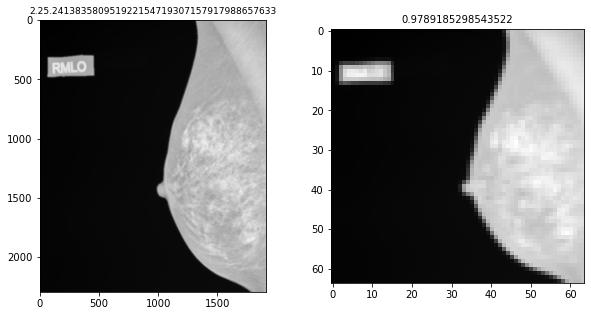

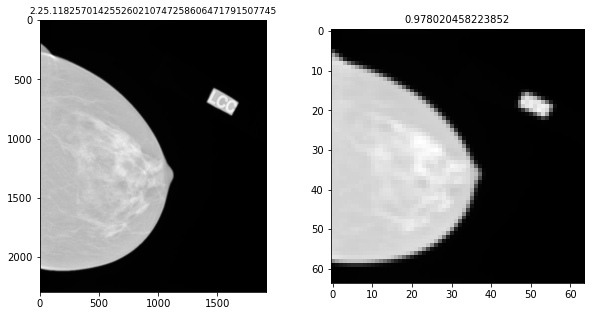

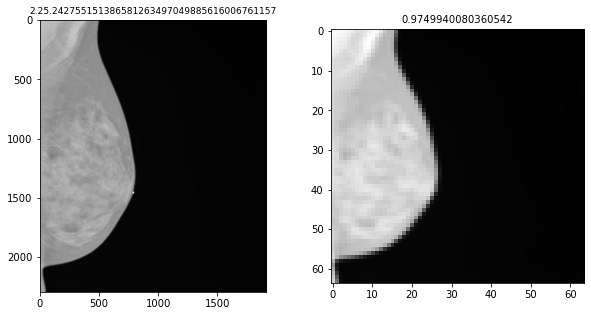

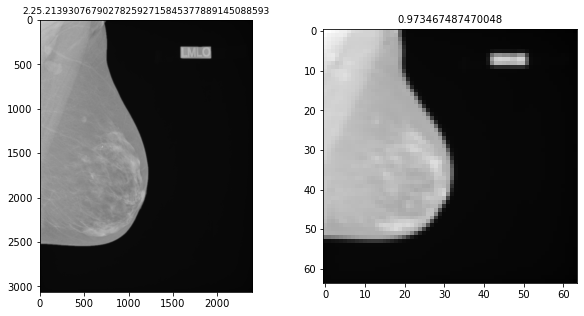

In [4]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='FB')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])